### Linear Regression

Step 1: Libraries ခေါ်ယူခြင်း (Importing Libraries)
-   Data Analysis နှင့် Visualization လုပ်ငန်းစဉ်များအတွက် မရှိမဖြစ်လိုအပ်သော Tools (Libraries) များကို Python env ထဲသို့ ခေါ်ယူလိုက်ခြင်း ဖြစ်သည်။

In [4]:
import pandas as pd              

# Work on actual data

Step 2: Fish Dataset ကို ဖတ်ယူခြင်း (Loading the Fish Dataset)
-   ယခုတစ်ခါတွင် (Synthetic Data) အစား တကယ့်လက်တွေ့လောကမှ ငါးများ၏ ကိုယ်အလေးချိန်နှင့် အရွယ်အစားများကို တိုင်းတာထားသည့် Fish Dataset ကို အသုံးပြုပြီး Regression လေ့ကျင့်ခန်း ဆက်လုပ်မှာဖြစ်ပါတယ်။

In [6]:
#   Data ကို ဖတ်မယ်
df = pd.read_csv(r'C:\Users\ThinkBook\Desktop\AI\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\hak_linear_regression\Real estate.csv')
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


Step 3: Features နှင့် Target ခွဲခြားခြင်း (Splitting Features and Target)

In [7]:
X = df[['X5 latitude']] 
y = df['Y house price of unit area']    

Step 4: Visualizing Raw Data
-   Machine Learning ရဲ့ ပထမအဆင့်အနေနဲ့ ကျွန်ုပ်တို့ဆီမှာရှိတဲ့ မူလငါးအချက်အလက် (Actual Data) တွေကို Graph ပေါ်မှာ အစက်လေးတွေအဖြစ် ချကြည့်ပြီး ဒေတာတွေရဲ့ ပြန့်ကျဲပုံကို စစ်ဆေးတာဖြစ်ပါတယ်။

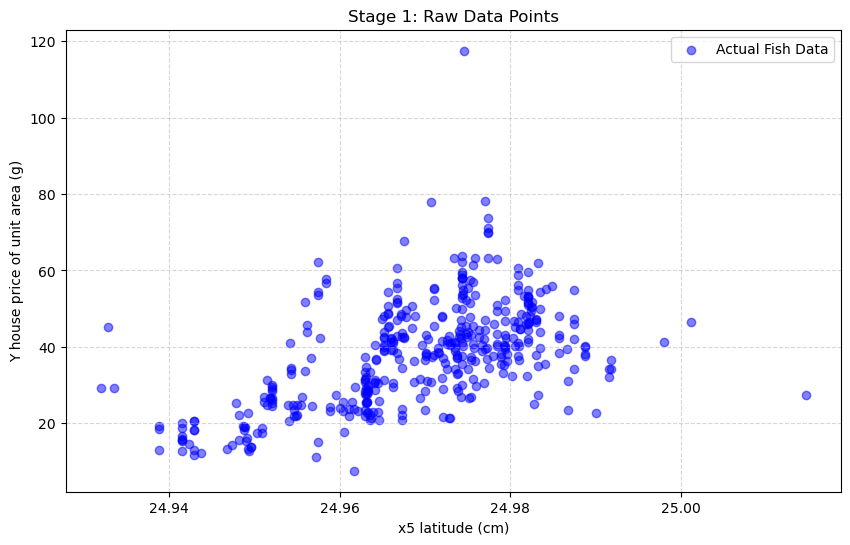

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6)) # ပုံ၏ အရွယ်အစားကို သတ်မှတ်ခြင်း

# မူလဒေတာများကို အပြာရောင်အစက် (Scatter Plot) များဖြင့် ဆွဲခြင်း
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Fish Data')

plt.title('Stage 1: Raw Data Points') # ပုံ၏ ခေါင်းစဉ်
plt.xlabel('x5 latitude (cm)')              # X-axis (ငါးအလျား) နာမည်ပေးခြင်း
plt.ylabel('Y house price of unit area (g)')              # Y-axis (ငါးအလေးချိန်) နာမည်ပေးခြင်း
plt.legend()                          # Label ပြရန် Legend ထည့်ခြင်း
plt.grid(True, linestyle='--', alpha=0.5) # ကြည့်ရလွယ်အောင် ဇယားကွက်လိုင်းလေးများ ထည့်ခြင်း
plt.show() # ပုံကို ထုတ်ပြခြင်း

Step 5: Linear Regression Model တည်ဆောက်ခြင်း (Model Building & Training)
-   Scikit-learn Library ထဲမှာ ပါဝင်တဲ့ Linear Regression Algorithm ကို အသုံးပြုပြီး ငါးရဲ့ အလျားနဲ့ အလေးချိန် ဆက်နွယ်မှုကို machine learning လုပ်ဆောင်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [9]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model တည်ဆောက်မယ်
model = LinearRegression() # Model Object တစ်ခုကို စတင်ဖန်တီးခြင်း

# Model Training
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Step 6: Regression Line အတွက် ခန့်မှန်းချက်များ ထုတ်ယူခြင်း (Generating Predictions for Visualization)
-   Model က သင်ယူထားတဲ့ ပုံသေနည်း (Trend) ကို မျဉ်းဖြောင့်အဖြစ် ပုံဖော်နိုင်ဖို့အတွက် ငါးအလျား အနည်းဆုံးတန်ဖိုးကနေ အများဆုံးတန်ဖိုးအထိ အချက်အလက်အသစ် (Range) တွေ ဖန်တီးပြီး အလေးချိန်ကို ခန့်မှန်းခိုင်းတဲ့ အဆင့်ဖြစ်ပါတယ်။

In [10]:
import numpy as np

# Regression Line ဆွဲရန်အတွက် အမှတ်များ ဖန်တီးခြင်း
X_range = pd.DataFrame(
    np.linspace(X.min(), X.max(), 100), # အနည်းဆုံးနှင့် အများဆုံးကြားတွင် အမှတ် ၁၀၀ ညီတူညီမျှ ခွဲထုတ်ခြင်း
    columns=X.columns                  # မူလ Column နာမည် (Length2) အတိုင်း ပြန်ပေးခြင်း
)

# ဖန်တီးထားသော X_range အပေါ် မူတည်ပြီး အလေးချိန် (y) ကို ခန့်မှန်းခြင်း
y_pred = model.predict(X_range)

Step 7: Adding the Regression Line
-   ဒါကတော့ နောက်ဆုံးအဆင့် ဖြစ်ပါတယ်။ ကျွန်ုပ်တို့ရဲ့ Linear Regression Model ကနေ တွက်ချက်လိုက်တဲ့ "အကောင်းဆုံး မျဉ်းဖြောင့်" ကို မူလဒေတာ အစက်လေးတွေပေါ်မှာ ထပ်တင်ပြီး ပုံဖော်လိုက်တာပါ။

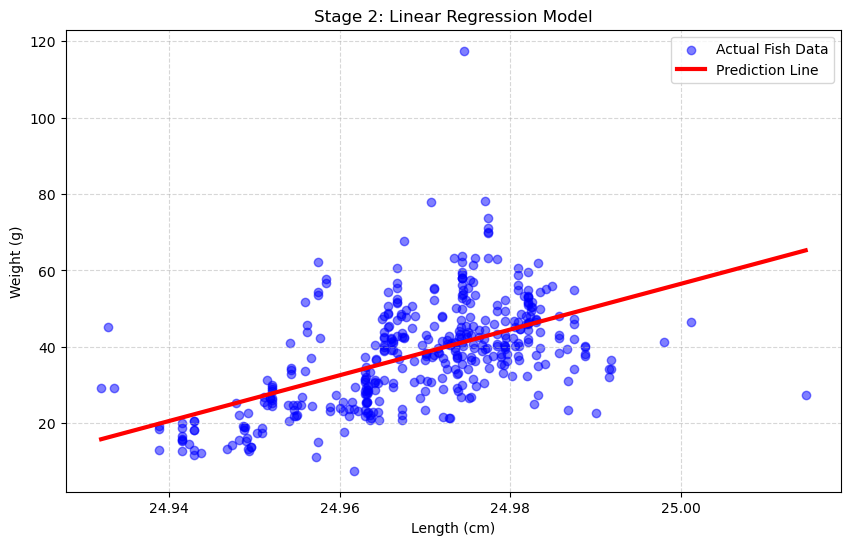

In [11]:
# Regression Line ကို ထပ်ထည့်မယ်
plt.figure(figsize=(10, 6))

# မူလ Data point များကို အပြာရောင်အစက်လေးများဖြင့် ဆွဲခြင်း
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Fish Data')

# Model က ခန့်မှန်းထားသော မျဉ်းကြောင်း (Regression Line) ကို အနီရောင်ဖြင့် ဆွဲခြင်း
plt.plot(X_range, y_pred, color='red', linewidth=3, label='Prediction Line')

plt.title('Stage 2: Linear Regression Model')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Step 8: Model Evaluation (စွမ်းဆောင်ရည်ကို တိုင်းတာစစ်ဆေးခြင်း)
-   Model တစ်ခု တည်ဆောက်ပြီးတဲ့အခါ အဲဒီ Model က ဘယ်လောက်အထိ တိကျမှုရှိသလဲ၊ ခန့်မှန်းချက်တွေနဲ့ အဖြေမှန်တွေကြားမှာ အမှား (Error) ဘယ်လောက်ရှိသလဲဆိုတာကို ကိန်းဂဏန်းတွေနဲ့ တိုင်းတာဖို့ လိုအပ်ပါတယ်။

In [12]:
from sklearn.metrics import mean_squared_error

# Metric တွက်ဖို့အတွက် မူလရှိပြီးသား X (အလျား) အားလုံးကို ပြန်လည်ခန့်မှန်းခိုင်းခြင်း
y_pred_all = model.predict(X)

# --- Metrics တွက်ချက်ခြင်း ---
# R-squared Score (Accuracy): 0 နှင့် 1 ကြားရှိပြီး 1 နှင့်နီးစပ်လျှင် ပိုကောင်းသည်
accuracy = model.score(X, y) 

# MSE နှင့် RMSE (အမှားတန်ဖိုးကို ရှာဖွေခြင်း)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse) # Mean Squared Error ကို Square root ပြန်ယူခြင်း

print(f" R2 Score: {accuracy:.4f} ")
print(f"RMSE: {rmse:.4f} grams")

 R2 Score: 0.2985 
RMSE: 11.3828 grams
